In [1]:
from __future__ import print_function 
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K

import tensorflow
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import math

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


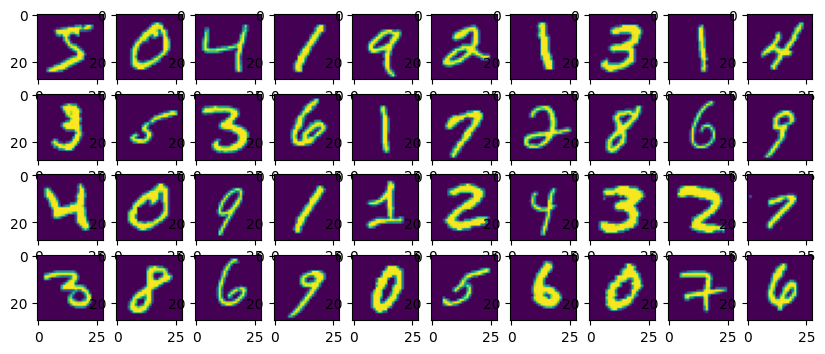

In [3]:
plt.figure(figsize=(10,4))
x,y = 10,4

for i in range(40):
    plt.subplot(y,x,i+1)
    plt.imshow(x_train[i])

In [5]:
batch_size = 128
num_classes = 10
epochs = 20
w_l2 = 0.01
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor = 0.2, patience= 5, min_lr = w_l2)

In [6]:
img_rows, img_columns = 28, 28

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_columns)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_columns)
    input_shape = (1, img_rows, img_columns)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_columns,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns,1)
    input_shape = (img_rows, img_columns, 1)
    
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " train sample")
print(x_test.shape[0], " test sample")

x_train shape:  (60000, 28, 28, 1)
60000  train sample
10000  test sample


In [7]:
w_l2 = 0.01
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), 
                 kernel_regularizer= keras.regularizers.l2(w_l2),
                ))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Conv2D(64, kernel_size=(3, 3), 
                 kernel_regularizer= keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer= keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(loss= keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist_sigmoid = model.fit(x_train, y_train,
                        batch_size = batch_size,
                         epochs = epochs,
                         verbose = 1,
                         validation_data = (x_test, y_test), callbacks = [reduce_lr])
score = model.evaluate(x_test, y_test, verbose= 0)


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)